In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### quest
- 주차별 환자 입원/퇴원 추이 시각화
- 요일별 환자 입원/퇴원 추이 시각화
- hint : df_DL['날짜_datetime'].dt.day_name()

#### 요일별 환자 입원 추이 시각화
- 요일별 환자 입원에 대한 입원기간
- 월요일과 화요일이 입원기간이 가장 김.
- 토요일이 입원기간이 가장 짧음.

In [4]:
df_ROS.describe(include=object)

,환자ID,직업,수술기법,혈액형,척추이동척도
count,1894,1479,1813,1894,1894
unique,1894,17,2,4,5
top,1PT,사무직,TELD,RH+A,Middle
freq,1,449,1673,688,1260


In [78]:
df_ROS['입원일자'] = df_ROS['입원일자'].astype(str)

In [79]:
df_ROS[['입원일자']].describe(include=object)

,입원일자
count,1894
unique,1051
top,20190129
freq,23


In [80]:
df_ROS['입원일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 입원일자
Non-Null Count  Dtype 
--------------  ----- 
1894 non-null   object
dtypes: object(1)
memory usage: 14.9+ KB


In [95]:
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'])

In [96]:
df_ROS['입원일자_datetime']

0      2019-07-13
1      2019-07-15
2      2019-07-29
3      2019-07-31
4      2019-09-03
          ...    
1889   2017-04-07
1890   2017-04-26
1891   2017-04-10
1892   2017-04-08
1893   2017-04-12
Name: 입원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [97]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.day_name()

<Axes: xlabel='입원일자_datetime_week'>

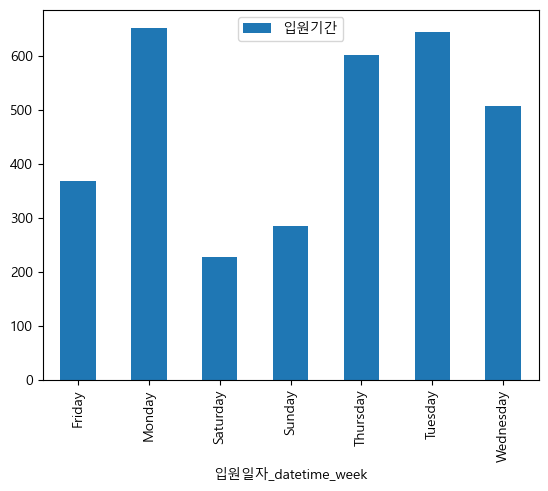

In [98]:
pd.pivot_table(data=df_ROS, index='입원일자_datetime_week', values='입원기간', aggfunc=sum).plot(kind='bar')  # 1차 방법(2차 데이터 사용시)

<Axes: xlabel='입원일자_datetime_week', ylabel='입원기간'>

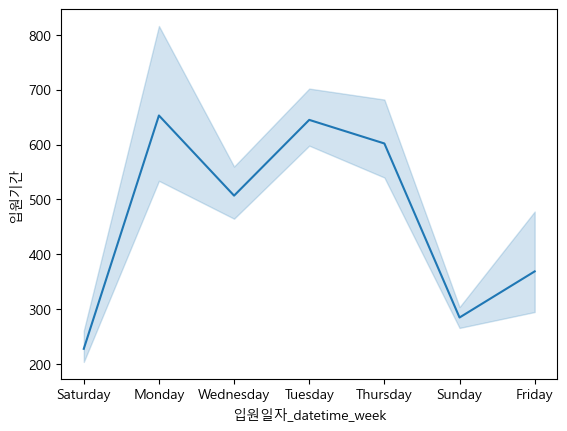

In [86]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_week', y='입원기간', estimator=sum)

#### 요일별 환자 퇴원 추이 시각화
- 요일별 환자 퇴원에 대한 입원기간
- 수요일 목요일 금요일에 퇴원환자가 입원기간이 가장 김.
- 일요일에 퇴원환자가 가장 적음.

In [54]:
df_ROS['퇴원일자'] = df_ROS['퇴원일자'].astype(str)

In [56]:
df_ROS[['퇴원일자']].describe(include=object)

,퇴원일자
count,1894
unique,1012
top,20120229
freq,46


In [58]:
df_ROS['퇴원일자'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 퇴원일자
Non-Null Count  Dtype 
--------------  ----- 
1894 non-null   object
dtypes: object(1)
memory usage: 14.9+ KB


In [59]:
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'])

In [60]:
df_ROS['퇴원일자_datetime']

0      2019-07-16
1      2019-07-16
2      2019-08-01
3      2019-08-03
4      2019-09-07
          ...    
1889   2017-04-08
1890   2017-04-29
1891   2017-04-12
1892   2017-04-11
1893   2017-04-13
Name: 퇴원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [61]:
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.day_name()

<Axes: xlabel='퇴원일자_datetime_week'>

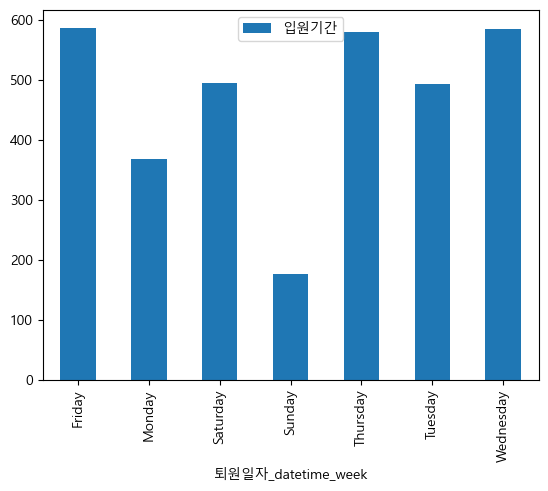

In [62]:
pd.pivot_table(data=df_ROS, index='퇴원일자_datetime_week', values='입원기간', aggfunc=sum).plot(kind='bar')  # 1차 방법(2차 데이터 사용시)

<Axes: xlabel='퇴원일자_datetime_week', ylabel='입원기간'>

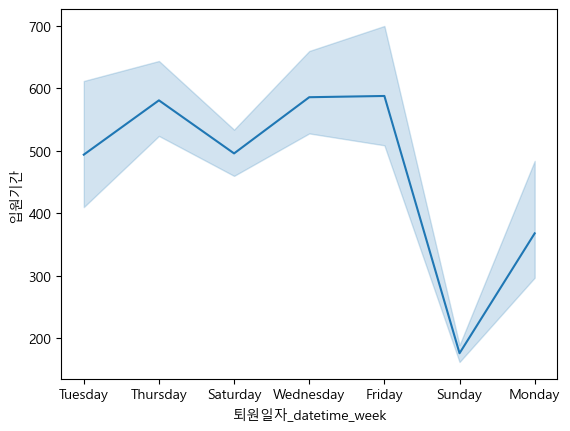

In [63]:
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_week', y='입원기간', estimator=sum)

#### 주차별 환자 입원 추이 시각화
- 주차별 환자 입원에 대한 입원기간
- 첫번째주차, 두번째주차에 입원환자가 입원 기간이 가장 김
- 여섯번째 주차에 입원환자가 입원 기간이 가장 적음

In [64]:
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'])

In [65]:
df_ROS['입원일자_datetime']

0      2019-07-13
1      2019-07-15
2      2019-07-29
3      2019-07-31
4      2019-09-03
          ...    
1889   2017-04-07
1890   2017-04-26
1891   2017-04-10
1892   2017-04-08
1893   2017-04-12
Name: 입원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [66]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.dayofweek

<Axes: xlabel='입원일자_datetime_week'>

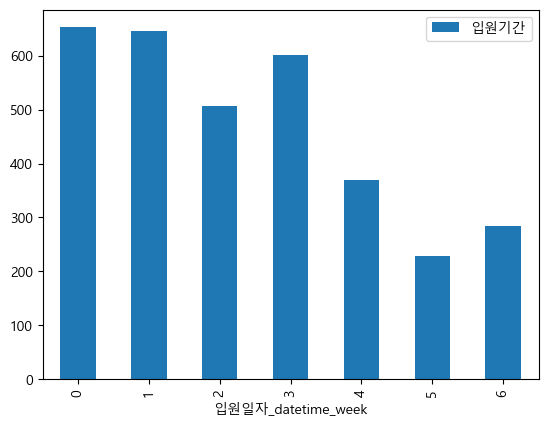

In [67]:
pd.pivot_table(data=df_ROS, index='입원일자_datetime_week', values='입원기간', aggfunc=sum).plot(kind='bar')  # 1차 방법(2차 데이터 사용시)

<Axes: xlabel='입원일자_datetime_week', ylabel='입원기간'>

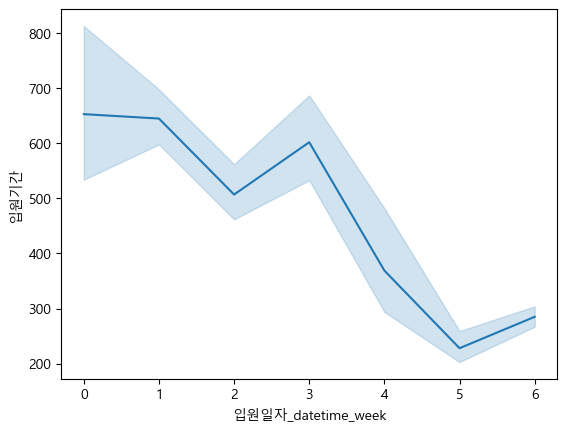

In [68]:
sns.lineplot(data=df_ROS, x='입원일자_datetime_week', y='입원기간', estimator=sum)

#### 주차별 환자 퇴원 추이 시각화
- 주차별 환자 퇴원에 대한 입원기간
- 세번째주차, 네번째주차, 다섯번째주차 퇴원환자가 가장 입원기간이 김.
- 일곱번째주차에 퇴원환자가 가장 입원기간이 적음.

In [69]:
df_ROS['퇴원일자_datetime'] = pd.to_datetime(df_ROS['퇴원일자'])

In [70]:
df_ROS['퇴원일자_datetime']

0      2019-07-16
1      2019-07-16
2      2019-08-01
3      2019-08-03
4      2019-09-07
          ...    
1889   2017-04-08
1890   2017-04-29
1891   2017-04-12
1892   2017-04-11
1893   2017-04-13
Name: 퇴원일자_datetime, Length: 1894, dtype: datetime64[ns]

In [71]:
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.dayofweek

<Axes: xlabel='퇴원일자_datetime_week'>

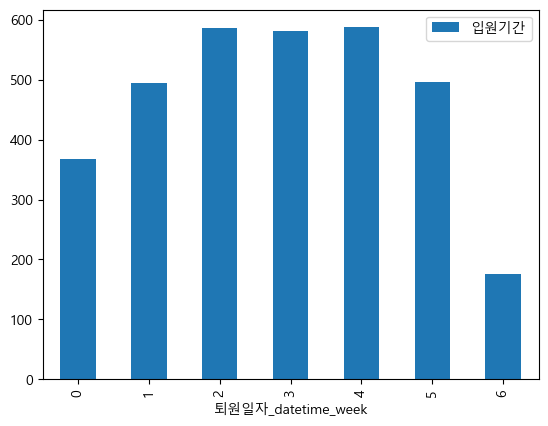

In [72]:
pd.pivot_table(data=df_ROS, index='퇴원일자_datetime_week', values='입원기간', aggfunc=sum).plot(kind='bar')  # 1차 방법(2차 데이터 사용시)

<Axes: xlabel='퇴원일자_datetime_week', ylabel='입원기간'>

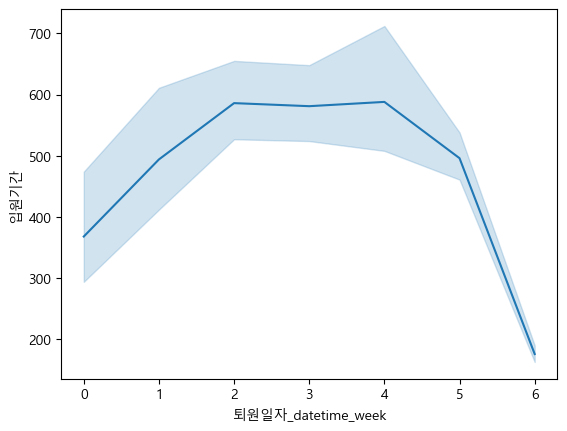

In [73]:
sns.lineplot(data=df_ROS, x='퇴원일자_datetime_week', y='입원기간', estimator=sum)

#### 주차별 환자 입원/퇴원 추이 분석의견
- 병원의 입장에선 입원 기간이 긴 환자들이 돈이됨
- 따라서 첫번째주, 두번째주에 입원환자를 많이 받는것이 좋고,
- 세번째, 네번째, 다섯번째주에 퇴원시키는 것을 권장해야한다(?)

#### 요일별 환자 입원/퇴원 추이 분석의견
- 위와 같이 병원 입장에선 입원기간이 긴 환자들이 돈이됨
- 따라서 월요일이나 화요일에 입원환자를 많이 받는것이 좋고,
- 수요일, 목요일, 금요일에 퇴원시키는 것을 권장해야한다(?)

## 이렇게 하는것이 맞는지 모르겠음.